# Power Law Analytic Notebook

## Purpose

I use this notebook to import and analyze power law data. I assume that the potential PL data is in a CSV file.

First, I import the procedures. Before this import works, however, the powerlaw and mpmath packages need to be installed. 

In [2]:
import numpy as np

import sys                  #This is needed to set up a working directory in Windows
import random, os, csv      # random is the rng, os is the operating system, and csv handles
                            # CSV files
import matplotlib.pyplot as plt  # This is the plotter
import time                 # This allows for lots of neat tricks.

In [ ]:
Next I import powerlaw specific packages and the data.

In [3]:
import powerlaw
import mpmath

In [4]:
Gendata = np.genfromtxt('N8-degree.csv')
Wolfdata = np.genfromtxt('Distribution.csv')

In [5]:
Gendata[:10]  #Check the first ten entries into htdata
Wolfdata[:10]

In [ ]:
Now I'm ready to do some analysis of the data with the powerlaw packages.

First, I create a fit of the data. There is a windows glitch in the powerlaw package which requires a first-time error handler to deal with a bug in the powerlaw software (for windows).

In [6]:
np.seterr(divide='ignore', invalid='ignore') # This is the error handler that you need
fitgen = powerlaw.Fit(Gendata, discrete=True) 
fitwolf = powerlaw.Fit(Wolfdata, discrete=True)

# This is just the regular powerlaw Fit method

## Power Law Results

Now we determine the alpha and the xmin (cutoff value). Alpha is determined by the MLE and Xmin is determined using Vuong method.

In [7]:
print("For the Generated Data")
print("Max Likelihood Estimate of Alpha: %5.3f" % (fitgen.power_law.alpha)) 
cutoffString_gen = '{:,.2f}'.format(fitgen.power_law.xmin)  # I'm just formatting the output
print("Cutoff value, xmin:  "+cutoffString_gen)

print ("For the Wolf Data")
print("Max Likelihood Estimate of Alpha: %5.3f" % (fitwolf.power_law.alpha)) 
cutoffString_wolf = '{:,.2f}'.format(fitwolf.power_law.xmin)  # I'm just formatting the output
print("Cutoff value, xmin:  "+cutoffString_wolf)

## Evaluating Different Distributions
I use the package to evaluate different distributions, determining the likelihood the distribution is explained by various distribution functions. 

In [9]:
Rgen, pgen = fitgen.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print((Rgen, pgen))
Rwolf, pwolf = fitwolf.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print((Rwolf, pwolf))
Rgen, pgen = fitgen.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print((Rgen, pgen))
Rwolf, pwolf = fitwolf.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print((Rwolf, pwolf))
Rgen, pgen = fitgen.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
print((Rgen, pgen))
Rwolf, pwolf = fitwolf.distribution_compare('power_law', 'truncated_power_law', normalized_ratio=True)
print((Rwolf, pwolf))

Based on these tests, I can't reject the power law in favor of the log-normal, or vice versa.  There is no support for the exponential distribution. 

## Visualizing the Distributions

The powerlaw package allows you to visualize the distribution, displaying the pdf, the cdf, and the CCDF. 

In [20]:
#%matplotlib inline
#powerlaw.plot_pdf(Wolfdata, color='g')
#powerlaw.plot_pdf(Wolfdata, Color ='r')
#plt.title("Degree Probability Density Function. Green = Generated; Red = Collected")
#plt.ylabel("p(x)")
#plt.xlabel("Degree")

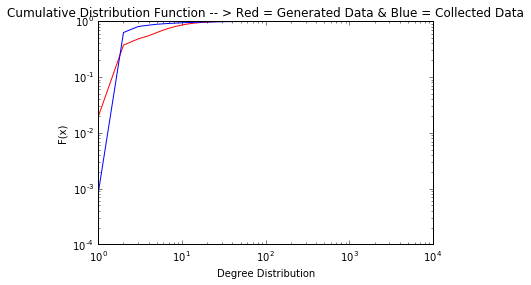

In [26]:
powerlaw.plot_cdf(Gendata, color='r')
powerlaw.plot_cdf(Wolfdata, color='b')
plt.title("Cumulative Distribution Function -- > Red = Generated Data & Blue = Collected Data")
plt.ylabel("F(x)")
plt.xlabel("Degree Distribution")

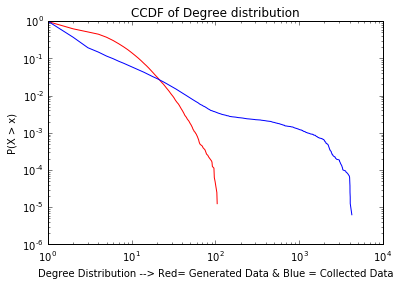

In [27]:
powerlaw.plot_ccdf(Gendata, color='r')
powerlaw.plot_ccdf(Wolfdata, color ='b')
plt.title("CCDF of Degree distribution")
plt.ylabel("P(X > x)")
plt.xlabel("Degree Distribution --> Red= Generated Data & Blue = Collected Data")

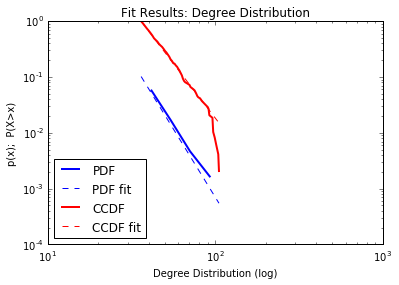

In [48]:
fig1=fitgen.plot_pdf(color='b', linewidth=2, label='PDF')
fitgen.power_law.plot_pdf(color='b', linestyle='--', ax=fig1, label='PDF fit')
fitgen.plot_ccdf(color='r', linewidth=2, ax=fig1,label="CCDF")    
fitgen.power_law.plot_ccdf(color='r', linestyle='--', ax=fig1,label='CCDF fit')
fig1.legend(loc='lower left')
plt.xlabel("Degree Distribution (log)")
plt.ylabel("p(x);  P(X>x)")
plt.title("Fit Results: Degree Distribution")

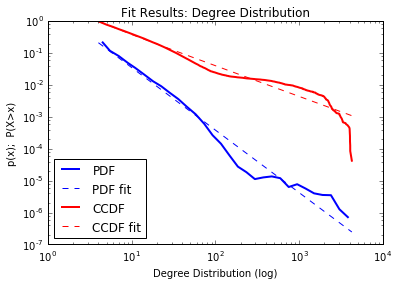

In [31]:
fig2=fitwolf.plot_pdf(color='b', linewidth=2, label='PDF')
fitwolf.power_law.plot_pdf(color='b', linestyle='--', ax=fig2, label='PDF fit')
fitwolf.plot_ccdf(color='r', linewidth=2, ax=fig2,label="CCDF")    
fitwolf.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2,label='CCDF fit')
fig2.legend(loc='lower left')
plt.xlabel("Degree Distribution (log)")
plt.ylabel("p(x);  P(X>x)")
plt.title("Fit Results: Degree Distribution")

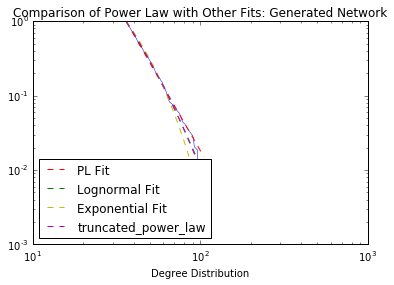

In [42]:
fig3 = fitgen.plot_ccdf(linewidth=0.5)
fitgen.power_law.plot_ccdf(ax=fig3, color='r', linestyle='--', label='PL Fit')
fitgen.lognormal.plot_ccdf(ax=fig3, color='g', linestyle='--', label='Lognormal Fit') 
fitgen.exponential.plot_ccdf(ax=fig3, color='y', linestyle='--', label='Exponential Fit') 
fitgen.truncated_power_law.plot_ccdf(ax=fig3, color='m', linestyle='--', label='truncated_power_law') 
plt.title("Comparison of Power Law with Other Fits: Generated Network")
plt.legend(loc="lower left")
plt.xlabel("Degree Distribution")

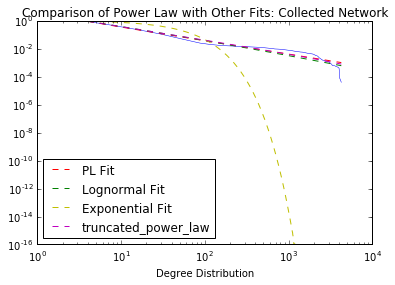

In [43]:
fig4 = fitwolf.plot_ccdf(linewidth=0.5)
fitwolf.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--', label='PL Fit')
fitwolf.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--', label='Lognormal Fit') 
fitwolf.exponential.plot_ccdf(ax=fig4, color='y', linestyle='--', label='Exponential Fit') 
fitwolf.truncated_power_law.plot_ccdf(ax=fig4, color='m', linestyle='--', label='truncated_power_law')
plt.title("Comparison of Power Law with Other Fits: Collected Network")
plt.legend(loc="lower left")
plt.xlabel("Degree Distribution")

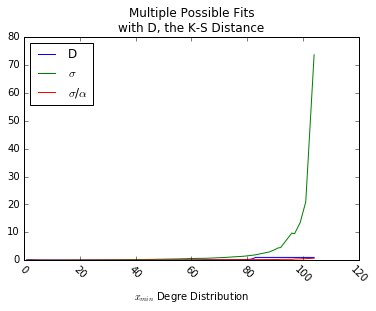

In [45]:
import matplotlib.ticker as tkr

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s


x_format = tkr.FuncFormatter(func)  # make formatter


plt.plot(fitgen.xmins, fitgen.Ds, label="D")
plt.plot(fitgen.xmins, fitgen.sigmas, label="$\sigma $")
# Note that you can see the data on a different scale if you comment out the above line.
plt.plot(fitgen.xmins, fitgen.sigmas/fitgen.alphas, label="$\sigma $" + "/" + "$\\alpha$")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
ax.xaxis.set_major_formatter(x_format) # set formatter to needed axis    
plt.legend(loc="upper left")
plt.title("Multiple Possible Fits\nwith D, the K-S Distance")
plt.xlabel("$x_{min}$ Degre Distribution")

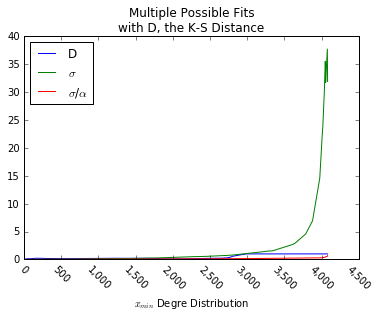

In [47]:
import matplotlib.ticker as tkr

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s


x_format = tkr.FuncFormatter(func)  # make formatter


plt.plot(fitwolf.xmins, fitwolf.Ds, label="D")
plt.plot(fitwolf.xmins, fitwolf.sigmas, label="$\sigma $")
# Note that you can see the data on a different scale if you comment out the above line.
plt.plot(fitwolf.xmins, fitwolf.sigmas/fitwolf.alphas, label="$\sigma $" + "/" + "$\\alpha$")
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(-45)
ax.xaxis.set_major_formatter(x_format) # set formatter to needed axis    
plt.legend(loc="upper left")
plt.title("Multiple Possible Fits\nwith D, the K-S Distance")
plt.xlabel("$x_{min}$ Degre Distribution")